<h1 style="color:blue" align=center>Spaceship Titanic Classification</h1>

- **Importing Libraries**

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")

In [3]:
pd.set_option('future.no_silent_downcasting', True)

- **Reading CSV File**

In [4]:
df = pd.read_csv("spaceship_data.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- **Shape of the Dataset**

In [140]:
df.shape

(8693, 14)

- **Info about the Dataset**

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<h1 style="color:blue" align=center>Data Cleaning</h1>

- **Creating Backup of Dataset**

In [142]:
backup = df.copy()

- **Null Values in the Dataset**

In [143]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

- **Dropping Unnecessary Columns from Dataset**

In [144]:
df.drop(["Name","Cabin","PassengerId"], axis="columns", inplace=True)

<h3 style="color:black" align=center>Cleaning Age Column</h3>

- **Distribution of Age Column**

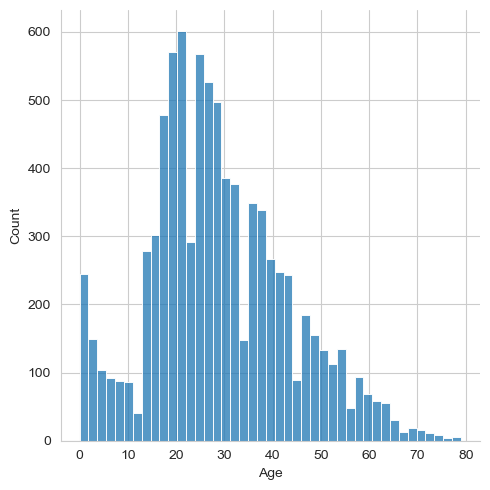

In [145]:
sns.displot(df["Age"])
plt.show()

- **Median of Age Column**

In [146]:
df["Age"].median()

27.0

- **Filling NaN Values in Age Column with Median Age**

In [147]:
df["Age"] = df["Age"].fillna(df["Age"].median())

- **Verifying that NaN Values are Removed**

In [148]:
df["Age"].isna().sum()

np.int64(0)

<h3 style="color:black" align=center>Cleaning VIP Column</h3>

- **Calculating Frequency Distribution of VIP Column**

In [149]:
freq_dist_vip = df["VIP"].value_counts()
freq_dist_vip

VIP
False    8291
True      199
Name: count, dtype: int64

- **Storing the Most Frequent Occuring Category in a Variable**

In [150]:
most_frequent = freq_dist_vip.idxmax()
most_frequent

False

- **Filling NaN Values in VIP Column with Most Frequent Value**

In [151]:
df["VIP"] = df["VIP"].fillna(most_frequent)

- **Verifying that NaN Values are Removed**

In [152]:
df["VIP"].isna().sum()

np.int64(0)

- **Converting VIP Column into int DataType**

In [153]:
df["VIP"] = df["VIP"].astype(np.int32)

<h3 style="color:black" align=center>Cleaning Destination Column</h3>

- **Calculating Frequency Distribution of Destination Column**

In [154]:
freq_dist_destination = df["Destination"].value_counts()
freq_dist_destination

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

- **Storing the Most Frequent Occuring Category in a Variable**

In [155]:
most_frequent = freq_dist_destination.idxmax()
most_frequent

'TRAPPIST-1e'

- **Filling NaN Values in Destination Column with Most Frequent Value**

In [156]:
df["Destination"] = df["Destination"].fillna(most_frequent)

- **Verifying that NaN Values are Removed**

In [157]:
df["Destination"].isna().sum()

np.int64(0)

<h3 style="color:black" align=center>Cleaning HomePlanet Column</h3>

- **Calculating Frequency Distribution of HomePlanet Column**

In [158]:
freq_dist_hp = df["HomePlanet"].value_counts()
freq_dist_hp

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

- **Storing the Most Frequent Occuring Category in a Variable**

In [159]:
most_frequent = freq_dist_hp.idxmax()
most_frequent

'Earth'

- **Filling NaN Values in HomePlanet Column with Most Frequent Value**

In [160]:
df["HomePlanet"] = df["HomePlanet"].fillna(most_frequent)

- **Verifying that NaN Values are Removed**

In [161]:
df["HomePlanet"].isna().sum()

np.int64(0)

<h3 style="color:black" align=center>Cleaning CryoSleep Column</h3>

- **Calculating Frequency Distribution of CryoSleep Column**

In [162]:
freq_dist_cryo = df["CryoSleep"].value_counts()
freq_dist_cryo

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

- **Storing the Most Frequent Occuring Category in a Variable**

In [163]:
most_frequent = freq_dist_cryo.idxmax()
most_frequent

False

- **Filling NaN Values in CryoSleep Column with Most Frequent Value**

In [164]:
df["CryoSleep"] = df["CryoSleep"].fillna(most_frequent)

- **Verifying that NaN Values are Removed**

In [165]:
df["CryoSleep"].isna().sum()

np.int64(0)

- **Converting CryoSleep Column into int DataType**

In [166]:
df["CryoSleep"] = df["CryoSleep"].astype(int)

<h3 style="color:black" align=center>Cleaning Transported Column</h3>

- **Converting Transported Column into int DataType**

In [167]:
df["Transported"] = df["Transported"].astype(int)

<h3 style="color:black" align=center>Cleaning RoomService, FoodCourt, ShoppingMall, Spa, VRDeck Column</h3>

- **Dropping Null Values from RoomService, FoodCourt, ShoppingMall, Spa, VRDeck Column**

In [168]:
df.dropna(inplace=True)

- **Verifying that NaN Values are Removed**

In [169]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

- **New Shape of the Dataset**

In [170]:
df.shape

(7785, 11)

- **Exporting Clean Data as CSV File**

In [171]:
df.to_csv("clean_spaceship_data.csv", index=False)

<h1 style="color:blue" align=center>Data Visualization</h1>

- **Number of Passengers Transported vs Not Transpoprted to their Planets**

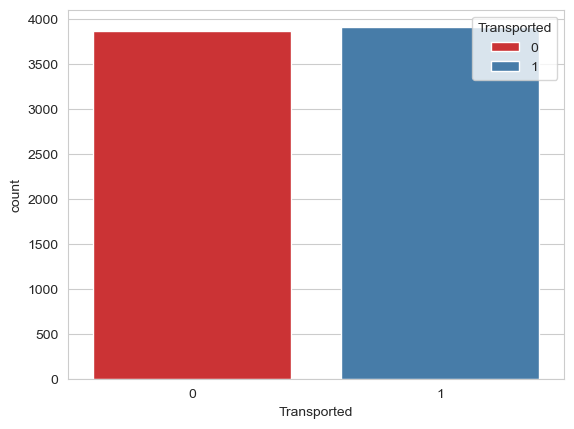

In [172]:
sns.countplot(data=df, x="Transported", hue="Transported", palette="Set1")
plt.show()

- **Number of Passengers in their HomePlanet**

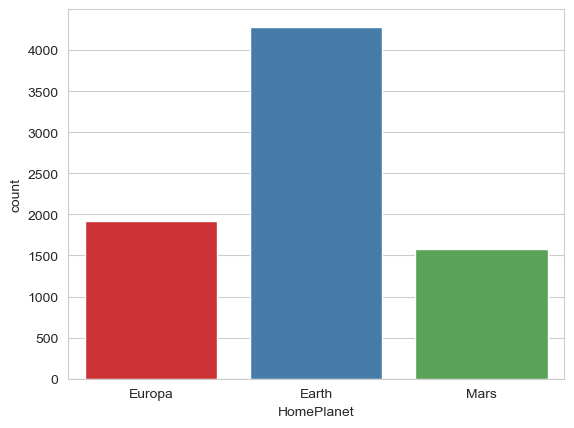

In [173]:
sns.countplot(data=df, x="HomePlanet", hue="HomePlanet", palette="Set1")
plt.show()

- **Number of Passengers opted for VIP Service**

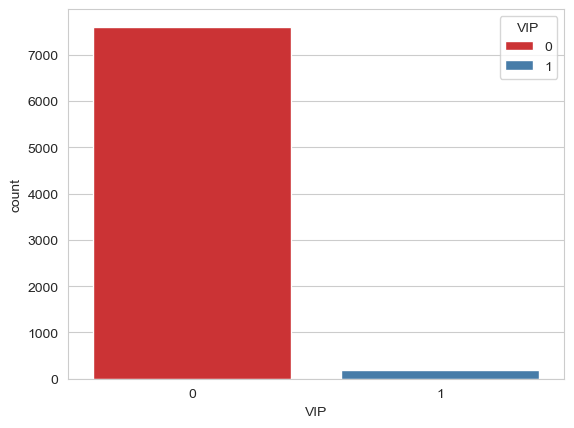

In [174]:
sns.countplot(data=df, x="VIP", hue="VIP", palette="Set1")
plt.show()

- **Number of Passengers going to their Destinations**

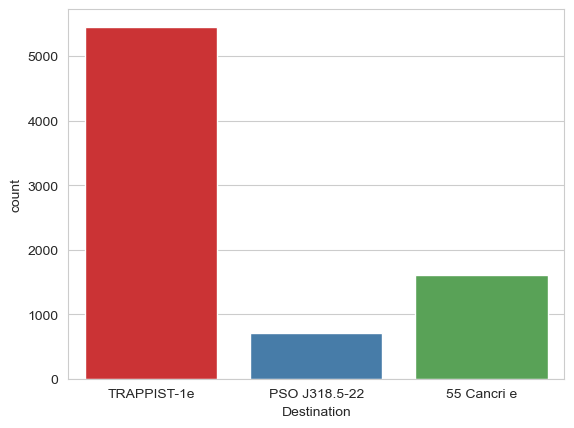

In [175]:
sns.countplot(data=df, x="Destination", hue="Destination", palette="Set1")
plt.show()

<h1 style="color:blue" align=center>Dummy Variable</h1>

- **Creating Dummy Variable for HomePlanet Column**

In [176]:
dummy_home = pd.get_dummies(df["HomePlanet"], dtype=int)

In [177]:
home_df = pd.DataFrame(dummy_home)

In [178]:
df2 = pd.concat([df,home_df], axis="columns")

- **Creating Dummy Variable for Destination Column**

In [179]:
dummy_dest = pd.get_dummies(df["Destination"], dtype=int)

In [180]:
dest_df = pd.DataFrame(dummy_dest)

In [181]:
df3 = pd.concat([df2,dest_df], axis="columns")

- **Dropping HomePlanet and Destination Column from DataFrame**

In [182]:
df3.drop(["HomePlanet","Destination"], axis="columns", inplace=True)

<h1 style="color:blue" align=center>Data Standardization</h1>

- **Storing RoomService, FoodCourt, ShoppingMall, Spa, VRDeck Columns into subset_cols Variable**

In [183]:
subset_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
subset_df = df[subset_cols]

- **Importing StandardScaler Library**

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

- **Fitting Data with StandardScaler**

In [185]:
scaler.fit(subset_df)

StandardScaler()

- **Transforming Data after fitting with StandardScaler**

In [186]:
scaled_values = scaler.transform(subset_df)

In [187]:
df[subset_cols] = scaled_values

- **Dropping RoomService, FoodCourt, ShoppingMall, Spa, VRDeck Columns from DataFrame**

In [188]:
df3.drop(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"], axis="columns", inplace=True)

- **Concatenating Scaled DataFrame and Orignal DataFrame**

In [189]:
df4 = pd.concat([df3, df[subset_cols]], axis="columns")

- **Final DataFrame**

In [190]:
df4.head()

,CryoSleep,Age,VIP,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,39.0,0,0,0,1,0,0,0,1,-0.335593,-0.286910,-0.284567,-0.273842,-0.270123
1,0,24.0,0,1,1,0,0,0,0,1,-0.173528,-0.281415,-0.243437,0.199897,-0.230328
2,0,58.0,1,0,0,1,0,0,0,1,-0.271659,1.896465,-0.284567,5.520618,-0.225806
3,0,33.0,0,0,0,1,0,0,0,1,-0.335593,0.496443,0.325805,2.598795,-0.095568
4,0,16.0,0,1,1,0,0,0,0,1,0.114916,-0.244171,-0.036141,0.213704,-0.268314


<h1 style="color:blue" align=center>Model Creation</h1>

- **Creating Dependent and Independent Variable**

In [191]:
X = df4.drop("Transported", axis="columns")
y = df4["Transported"]

- **Importing Train Test Split**

In [192]:
from sklearn.model_selection import train_test_split

- **Dividing Data into X_train, X_test, y_train, y_test**

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<h1 style="color:blue" align=center>Support Vector Machine</h1>

- **Importing SVM Model**

In [194]:
from sklearn.svm import SVC

In [195]:
svc = SVC()

- **Fitting Data with Model**

In [196]:
svc.fit(X_train, y_train)

SVC()

- **Predicting Values from our Trained Model**

In [197]:
y_predicted = svc.predict(X_test)

- **Evaluating the SVC Model**

In [198]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [199]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1281
           1       0.77      0.76      0.76      1289

    accuracy                           0.76      2570
   macro avg       0.76      0.76      0.76      2570
weighted avg       0.76      0.76      0.76      2570



In [200]:
cm = confusion_matrix(y_test, y_predicted)

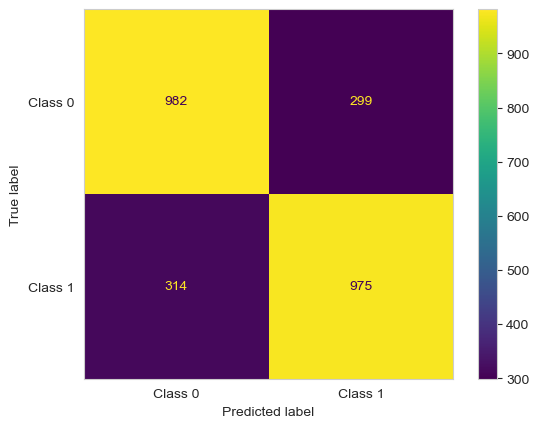

In [201]:
dist = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])
dist.plot()
plt.grid(visible=False)
plt.show()

<h1 style="color:blue" align=center>Random Forest</h1>

- **Importing Random Forest Classifier**

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
rf = RandomForestClassifier()

- **Fitting Data with Model**

In [205]:
rf.fit(X_train, y_train)

RandomForestClassifier()

- **Predicting Values from our Trained Model**

In [206]:
y_predicted = rf.predict(X_test)

- **Evaluating the Random Forest Model**

In [207]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [208]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1281
           1       0.79      0.76      0.77      1289

    accuracy                           0.78      2570
   macro avg       0.78      0.78      0.78      2570
weighted avg       0.78      0.78      0.78      2570



In [209]:
cm = confusion_matrix(y_test, y_predicted)

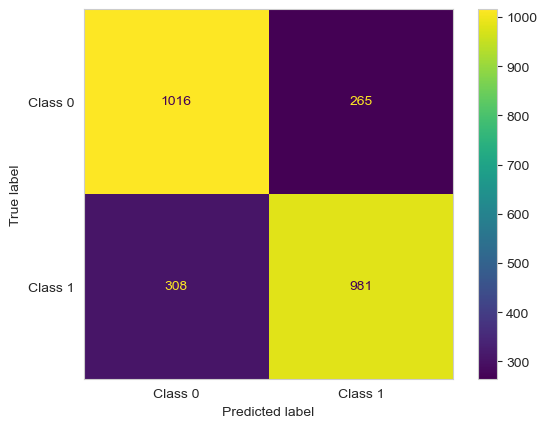

In [210]:
dist = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])
dist.plot()
plt.grid(visible=False)
plt.show()

<h1 style="color:blue" align=center>Cross Validation</h1>

- **Importing K-Fold Cross Validation**

In [211]:
from sklearn.model_selection import KFold

- **Dividing Data based on n_splits**

In [212]:
kf = KFold(n_splits=5, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

- **Importing Cross Val Score**

In [213]:
from sklearn.model_selection import cross_val_score

- **Cross Val Score of Support Vector Machine**

In [214]:
cross_val_score(svc, X_train, y_train).mean()

np.float64(0.7741131351869607)

- **Cross Val Score of Random Forest Classifier**

In [215]:
cross_val_score(rf, X_train, y_train).mean()

np.float64(0.7756471716203259)

- **Exporting the Best Performing Model as Pickle File**

In [216]:
with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf, file)